In [1]:
import pandas as pd 
import numpy as np
import json
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://api.spacexdata.com/v4/launches/past"
response=requests.get(url)
response.json()

[{'fairings': {'reused': False,
   'recovery_attempt': False,
   'recovered': False,
   'ships': []},
  'links': {'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png',
    'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'},
   'reddit': {'campaign': None,
    'launch': None,
    'media': None,
    'recovery': None},
   'flickr': {'small': [], 'original': []},
   'presskit': None,
   'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88',
   'youtube_id': '0a_00nJ_Y88',
   'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
   'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'},
  'static_fire_date_utc': '2006-03-17T00:00:00.000Z',
  'static_fire_date_unix': 1142553600,
  'net': False,
  'window': 0,
  'rocket': '5e9d0d95eda69955f709d1eb',
  'success': False,
  'failures': [{'time': 33,
    'altitude': None,
    'reason': 'merlin engine failure'}],
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'crew

In [3]:
data=pd.json_normalize(response.json())

In [4]:
data

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/NONM-xsKMSs,NONM-xsKMSs,None,None,NaN
183,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,None,None,None,None,NaN
184,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/ZlQHF_yBkMQ,ZlQHF_yBkMQ,None,None,NaN
185,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/VVu2bSJJhgI,VVu2bSJJhgI,None,None,NaN


Data collection

In [5]:
def get_rocket_name(id):
        response=requests.get("https://api.spacexdata.com/v4/rockets/"+str(id)).json()
        return response['name']

In [6]:
data['rocket_name']=data['rocket'].apply(get_rocket_name)

In [7]:
data.sample(5)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings,rocket_name
83,2019-11-11T12:08:00.000Z,1.573474e+09,False,0.0,5e9d0d95eda69973a809d1ec,True,[],This mission will launch the first batch of St...,[],"[5ea6ed2e080df4000697c908, 5ea6ed30080df400069...",...,https://www.reddit.com/r/spacex/comments/du1du...,[],[https://live.staticflickr.com/65535/490519888...,https://www.spacex.com/sites/spacex/files/star...,https://youtu.be/pIDuv0Ta0XQ,pIDuv0Ta0XQ,https://spaceflightnow.com/2019/11/11/successf...,https://en.wikipedia.org/wiki/Starlink_(satell...,NaN,Falcon 9
66,2018-08-02T15:53:00.000Z,1.533225e+09,False,7200.0,5e9d0d95eda69973a809d1ec,True,[],SpaceX's fifteenth flight of 2018 launched the...,[],"[5ea6ed2f080df4000697c90d, 5ea6ed30080df400069...",...,None,[],[https://farm2.staticflickr.com/1798/438624952...,https://www.spacex.com/sites/spacex/files/mera...,https://www.youtube.com/watch?v=FjfQNBYv2IY,FjfQNBYv2IY,https://spaceflightnow.com/2018/08/07/indonesi...,https://en.wikipedia.org/wiki/Telkom_Indonesia,NaN,Falcon 9
113,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],This mission launches the sixteenth batch of o...,[],"[5ea6ed2e080df4000697c907, 5ea6ed2e080df400069...",...,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[https://live.staticflickr.com/65535/508557378...,None,https://youtu.be/84Nct_Q9Lqw,84Nct_Q9Lqw,https://spaceflightnow.com/2021/01/20/spacex-s...,https://en.wikipedia.org/wiki/Starlink,NaN,Falcon 9
47,2017-10-05T13:31:00.000Z,1.507210e+09,False,0.0,5e9d0d95eda69973a809d1ec,True,[],Third of eight missions to launch Iridium's se...,[],"[5ea6ed2e080df4000697c905, 5ea6ed2f080df400069...",...,https://www.reddit.com/r/spacex/comments/75z82...,[],[https://farm5.staticflickr.com/4509/376105500...,http://www.spacex.com/sites/spacex/files/iridi...,https://www.youtube.com/watch?v=SB4N4xF2B2w&fe...,SB4N4xF2B2w,https://spaceflightnow.com/2017/10/09/spacex-l...,https://en.wikipedia.org/wiki/Iridium_satellit...,NaN,Falcon 9
109,2020-12-03T13:45:00.000Z,1.607003e+09,False,NaN,5e9d0d95eda69973a809d1ec,True,[],SpaceX's 21st ISS resupply mission on behalf o...,[],"[5ea6ed30080df4000697c913, 5ea6ed2f080df400069...",...,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[https://live.staticflickr.com/65535/506892546...,https://www.nasa.gov/sites/default/files/atoms...,https://youtu.be/4xJAGFR_N-c,4xJAGFR_N-c,https://spaceflightnow.com/2020/12/06/spacex-l...,https://en.wikipedia.org/wiki/SpaceX_CRS-21,NaN,Falcon 9


In [66]:
def get_longitude(id):
    response=requests.get("https://api.spacexdata.com/v4/launchpads/"+str(id)).json()
    return response['longitude']
def get_latitude(id):
    response=requests.get("https://api.spacexdata.com/v4/launchpads/"+str(id)).json()
    return response['latitude']
def get_launchsite(id):
    response=requests.get("https://api.spacexdata.com/v4/launchpads/"+str(id)).json()
    return response['name']

In [63]:
data['longitude']=data['launchpad'].apply(get_longitude)

In [68]:
data['latitude']=data['launchpad'].apply(get_latitude)

In [67]:
data['launch_site']=data['launchpad'].apply(get_launchsite)

In [85]:
def get_mass(load):
    response=requests.get("https://api.spacexdata.com/v4/payloads/"+str(load[0])).json()
    return response['mass_kg']

def get_orbit(load):
    response=requests.get("https://api.spacexdata.com/v4/payloads/"+str(load[0])).json()
    return response['orbit']

In [86]:
data['Mass']=data['payloads'].apply(get_mass)
data['Orbit']=data['payloads'].apply(get_orbit)

In [87]:
data

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.youtube_id,links.article,links.wikipedia,fairings,rocket_name,longitude,launch_site,latitude,Mass,Orbit
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN,Falcon 1,167.743129,Kwajalein Atoll,9.047721,20.0,LEO
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN,Falcon 1,167.743129,Kwajalein Atoll,9.047721,NaN,LEO
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN,Falcon 1,167.743129,Kwajalein Atoll,9.047721,NaN,LEO
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN,Falcon 1,167.743129,Kwajalein Atoll,9.047721,165.0,LEO
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN,Falcon 1,167.743129,Kwajalein Atoll,9.047721,200.0,LEO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,NONM-xsKMSs,None,None,NaN,Falcon 9,-80.577366,CCSFS SLC 40,28.561857,13260.0,VLEO
183,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,None,None,NaN,Falcon 9,-80.603956,KSC LC 39A,28.608058,13260.0,VLEO
184,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,ZlQHF_yBkMQ,None,None,NaN,Falcon 9,-80.577366,CCSFS SLC 40,28.561857,13260.0,VLEO
185,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,VVu2bSJJhgI,None,None,NaN,Falcon 9,-80.577366,CCSFS SLC 40,28.561857,13260.0,VLEO


In [130]:
def getCoreData(data):
    for core in data['cores']:
            if core[0]['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core[0]['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core[0]['landing_success'])+' '+str(core[0]['landing_type']))
            Flights.append(core[0]['flight'])
            GridFins.append(core[0]['gridfins'])
            Reused.append(core[0]['reused'])
            Legs.append(core[0]['legs'])
            LandingPad.append(core[0]['landpad'])

In [131]:
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []

In [132]:
getCoreData(data)

In [103]:
data['date'] = pd.to_datetime(data['date_utc']).dt.date


<ipython-input-103-d9e9a17ba211>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date_utc']).dt.date


In [134]:
data_dict = {
    'Outcome': Outcome,
    'Flights': Flights,
    'GridFins': GridFins,
    'Reused': Reused,
    'Legs': Legs,
    'LandingPad': LandingPad,
    'Block': Block,
    'ReusedCount': ReusedCount,
    'Serial': Serial
}

df = pd.DataFrame(data_dict)
df

,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,None None,1,False,False,False,None,NaN,0,Merlin1A
1,None None,1,False,False,False,None,NaN,0,Merlin2A
2,None None,1,False,False,False,None,NaN,0,Merlin1C
3,None None,1,False,False,False,None,NaN,0,Merlin2C
4,None None,1,False,False,False,None,NaN,0,Merlin3C
...,...,...,...,...,...,...,...,...,...
179,True ASDS,7,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,6,B1052
180,True ASDS,14,True,True,True,5e9e3033383ecb075134e7cd,5.0,13,B1058
181,True ASDS,6,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1067
182,True ASDS,4,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0,B1072


In [135]:
data.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings', 'rocket_name', 'longitude', 'launch_site', 'latitude',
       'Mass', 'Orbit', 'date'],
      dtype='object')

In [145]:
data_cols = ['date','rocket_name','Mass','Orbit','launch_site','longitude','latitude']
df1=pd.concat([data[data_cols],df],axis=1)

In [146]:
df1

,date,rocket_name,Mass,Orbit,launch_site,longitude,latitude,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,167.743129,9.047721,None None,1.0,False,False,False,None,NaN,0.0,Merlin1A
1,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,167.743129,9.047721,None None,1.0,False,False,False,None,NaN,0.0,Merlin2A
2,2008-08-03,Falcon 1,NaN,LEO,Kwajalein Atoll,167.743129,9.047721,None None,1.0,False,False,False,None,NaN,0.0,Merlin1C
3,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,167.743129,9.047721,None None,1.0,False,False,False,None,NaN,0.0,Merlin2C
4,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,167.743129,9.047721,None None,1.0,False,False,False,None,NaN,0.0,Merlin3C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2022-09-05,Falcon 9,13260.0,VLEO,CCSFS SLC 40,-80.577366,28.561857,True ASDS,4.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0.0,B1072
183,2022-09-11,Falcon 9,13260.0,VLEO,KSC LC 39A,-80.603956,28.608058,True ASDS,1.0,True,False,True,5e9e3033383ecbb9e534e7cc,5.0,0.0,B1077
184,2022-09-17,Falcon 9,13260.0,VLEO,CCSFS SLC 40,-80.577366,28.561857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,2022-09-24,Falcon 9,13260.0,VLEO,CCSFS SLC 40,-80.577366,28.561857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df1=df1[df1['rocket_name']=='Falcon 9']

In [149]:
df1

,date,rocket_name,Mass,Orbit,launch_site,longitude,latitude,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
5,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,None,1.0,0.0,B0003
6,2010-12-08,Falcon 9,NaN,LEO,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,None,1.0,0.0,B0004
7,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,None,1.0,0.0,B0005
8,2012-10-08,Falcon 9,400.0,ISS,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,None,1.0,0.0,B0006
9,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,None,1.0,0.0,B0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2022-09-05,Falcon 9,13260.0,VLEO,CCSFS SLC 40,-80.577366,28.561857,True ASDS,4.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0.0,B1072
183,2022-09-11,Falcon 9,13260.0,VLEO,KSC LC 39A,-80.603956,28.608058,True ASDS,1.0,True,False,True,5e9e3033383ecbb9e534e7cc,5.0,0.0,B1077
184,2022-09-17,Falcon 9,13260.0,VLEO,CCSFS SLC 40,-80.577366,28.561857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,2022-09-24,Falcon 9,13260.0,VLEO,CCSFS SLC 40,-80.577366,28.561857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data cleaning

In [10]:
df1.isnull().sum()

date            0
rocket_name     0
Mass            0
Orbit           0
launch_site     0
longitude       0
latitude        0
Outcome         0
Flights         0
GridFins        0
Reused          0
Legs            0
LandingPad     30
Block           0
ReusedCount     0
Serial          0
dtype: int64

In [151]:
mass_mean=df1['Mass'].mean()

In [153]:
df1['Mass'].replace(np.nan,mass_mean,inplace=True)

C:\Users\Lenovo Ideapad L340\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [155]:
cols_to_check = ['Orbit', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Serial']
df1_clean = df1.dropna(subset=cols_to_check)

In [156]:
df1_clean.isnull().sum()

date            0
rocket_name     0
Mass            0
Orbit           0
launch_site     0
longitude       0
latitude        0
Outcome         0
Flights         0
GridFins        0
Reused          0
Legs            0
LandingPad     30
Block           0
ReusedCount     0
Serial          0
dtype: int64

In [157]:
df1_clean

,date,rocket_name,Mass,Orbit,launch_site,longitude,latitude,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
5,2010-06-04,Falcon 9,8117.574038,LEO,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,None,1.0,0.0,B0003
6,2010-12-08,Falcon 9,8117.574038,LEO,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,None,1.0,0.0,B0004
7,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,None,1.0,0.0,B0005
8,2012-10-08,Falcon 9,400.000000,ISS,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,None,1.0,0.0,B0006
9,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,None,1.0,0.0,B0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2022-08-19,Falcon 9,13260.000000,VLEO,CCSFS SLC 40,-80.577366,28.561857,True ASDS,7.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,6.0,B1052
180,2022-08-28,Falcon 9,13260.000000,VLEO,KSC LC 39A,-80.603956,28.608058,True ASDS,14.0,True,True,True,5e9e3033383ecb075134e7cd,5.0,13.0,B1058
181,2022-08-31,Falcon 9,13260.000000,VLEO,VAFB SLC 4E,-120.610829,34.632093,True ASDS,6.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5.0,B1067
182,2022-09-05,Falcon 9,13260.000000,VLEO,CCSFS SLC 40,-80.577366,28.561857,True ASDS,4.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0.0,B1072


In [158]:
df1_clean.to_csv('cleaned_df',index=False)

In [179]:
df1_clean['launch_site'].value_counts()

CCSFS SLC 40    97
KSC LC 39A      50
VAFB SLC 4E     28
Name: launch_site, dtype: int64

In [180]:
df1_clean['Orbit'].value_counts()

VLEO     56
GTO      34
ISS      32
LEO      15
PO       14
SSO      12
MEO       5
TLI       2
GEO       2
HEO       1
SO        1
ES-L1     1
Name: Orbit, dtype: int64

In [181]:
landing_outcome=df1_clean['Outcome'].value_counts()

In [21]:
df1_clean['Class']=df1_clean['Outcome'].apply(lambda x:1 if 'True' in x else 0)

In [169]:
df1_clean['Class'].mean()

0.7942857142857143

In [176]:
df1_clean[df1_clean['Outcome'].str.contains("None")]['Class'].value_counts()

0    25
Name: Class, dtype: int64

EDA 

In [7]:
df1_clean=pd.read_csv("cleaned_df")

In [22]:
df1_clean

,date,rocket_name,Mass,Orbit,launch_site,longitude,latitude,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,flight_number,Class
0,2010-06-04,Falcon 9,8117.574038,LEO,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,NaN,1.0,0.0,B0003,1,0
1,2010-12-08,Falcon 9,8117.574038,LEO,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,NaN,1.0,0.0,B0004,2,0
2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,NaN,1.0,0.0,B0005,3,0
3,2012-10-08,Falcon 9,400.000000,ISS,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,NaN,1.0,0.0,B0006,4,0
4,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,-80.577366,28.561857,None None,1.0,False,False,False,NaN,1.0,0.0,B0007,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2022-08-19,Falcon 9,13260.000000,VLEO,CCSFS SLC 40,-80.577366,28.561857,True ASDS,7.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,6.0,B1052,171,1
171,2022-08-28,Falcon 9,13260.000000,VLEO,KSC LC 39A,-80.603956,28.608058,True ASDS,14.0,True,True,True,5e9e3033383ecb075134e7cd,5.0,13.0,B1058,172,1
172,2022-08-31,Falcon 9,13260.000000,VLEO,VAFB SLC 4E,-120.610829,34.632093,True ASDS,6.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5.0,B1067,173,1
173,2022-09-05,Falcon 9,13260.000000,VLEO,CCSFS SLC 40,-80.577366,28.561857,True ASDS,4.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0.0,B1072,174,1


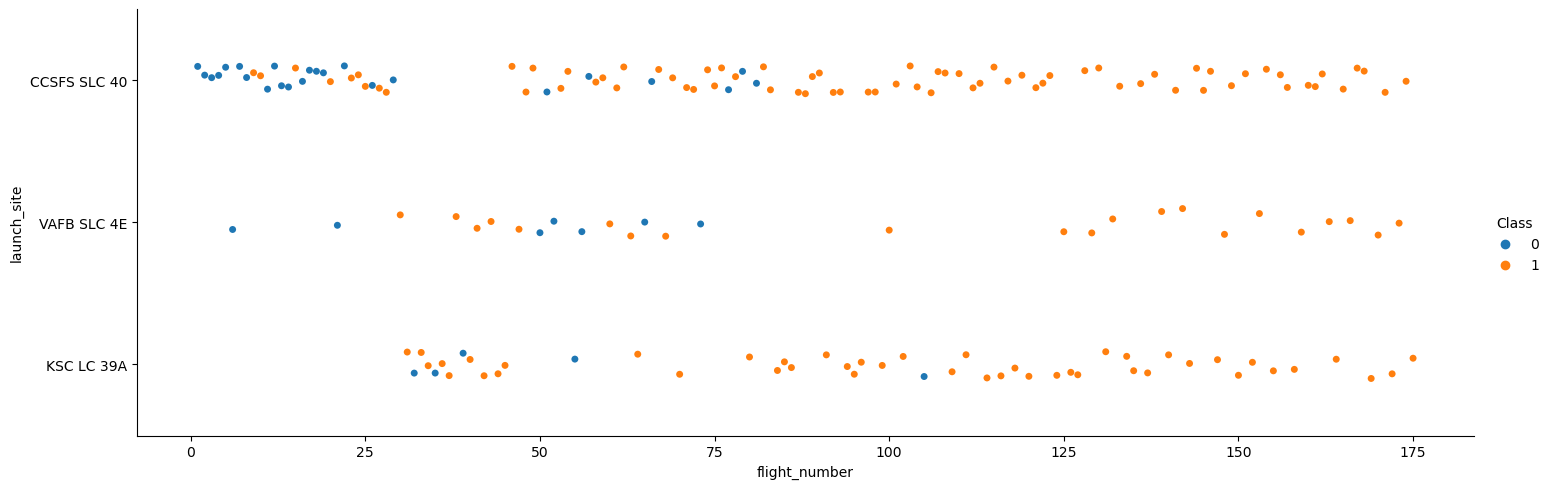

In [35]:
sns.catplot(x='flight_number',y='launch_site',hue='Class',data=df1_clean,aspect=3)

plt.show()

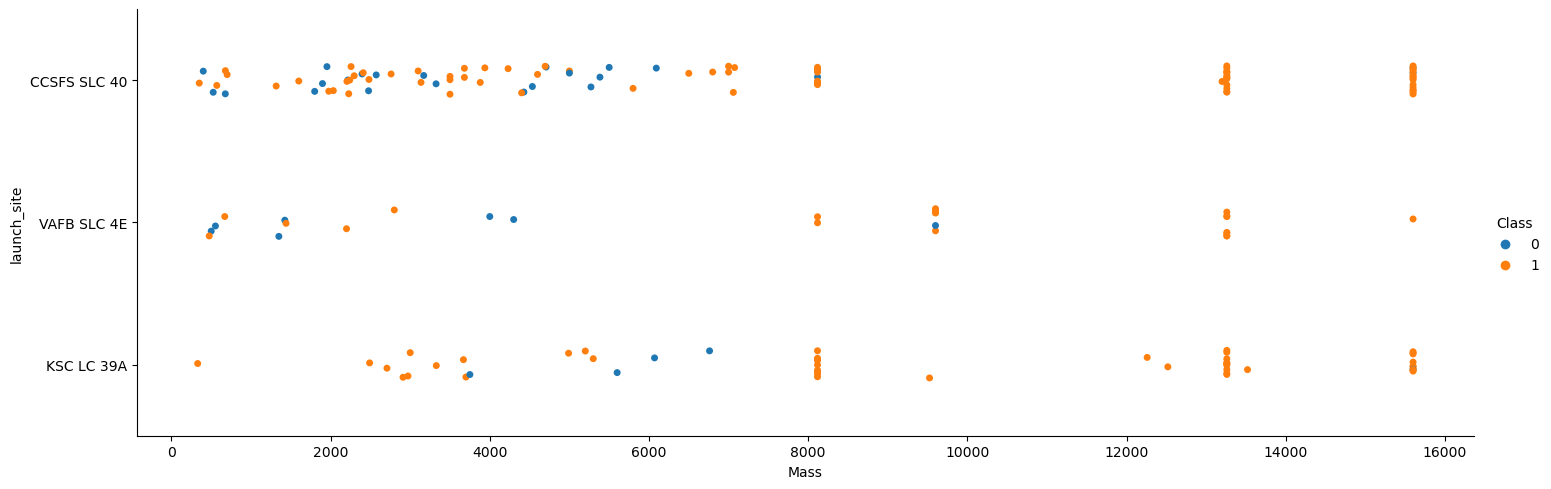

In [36]:
sns.catplot(x='Mass',y='launch_site',hue='Class',data=df1_clean,aspect=3)
plt.show()

In [37]:
df1_clean['Orbit'].unique()

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO', 'TLI'], dtype=object)

In [45]:
orbit=df1_clean.groupby("Orbit").mean('Class')
orbit =orbit.reset_index()
orbit

,Orbit,Mass,longitude,latitude,Flights,GridFins,Reused,Legs,Block,ReusedCount,flight_number,Class
0,ES-L1,570.000000,-80.577366,28.561857,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,15.000000,1.000000
1,GEO,6027.787019,-80.577366,28.561857,6.500000,1.000000,1.000000,1.000000,5.000000,7.000000,123.500000,1.000000
2,GTO,4855.230882,-80.584404,28.574087,2.088235,0.705882,0.441176,0.676471,3.205882,2.970588,48.000000,0.558824
3,HEO,350.000000,-80.577366,28.561857,1.000000,1.000000,0.000000,1.000000,5.000000,3.000000,54.000000,1.000000
4,ISS,4528.772446,-80.589830,28.583514,2.843750,0.812500,0.406250,0.843750,3.687500,4.812500,68.843750,0.750000
5,LEO,5873.039487,-85.922252,29.383542,2.200000,0.733333,0.333333,0.800000,3.400000,2.800000,75.200000,0.800000
6,MEO,3828.400000,-80.577366,28.561857,6.000000,1.000000,1.000000,1.000000,5.000000,8.200000,107.400000,1.000000
7,PO,8293.785714,-117.751296,34.198505,2.785714,0.857143,0.642857,0.785714,3.785714,3.642857,64.857143,0.714286
8,SO,8117.574038,-80.603956,28.608058,2.000000,1.000000,1.000000,1.000000,5.000000,5.000000,80.000000,1.000000
9,SSO,4046.691346,-100.594097,31.596975,5.333333,0.916667,0.750000,0.916667,4.750000,6.250000,101.083333,0.750000


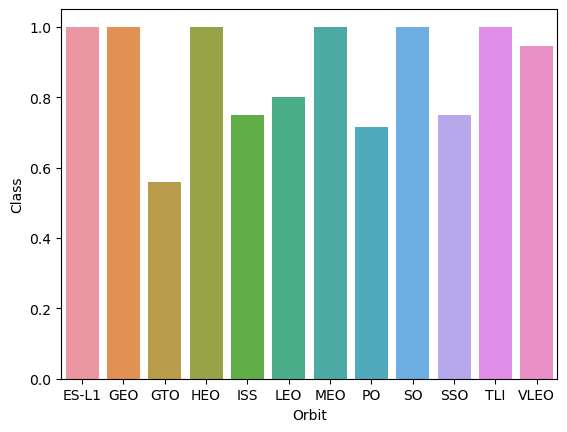

In [46]:
sns.barplot(x='Orbit',y='Class',data=orbit)
plt.show()

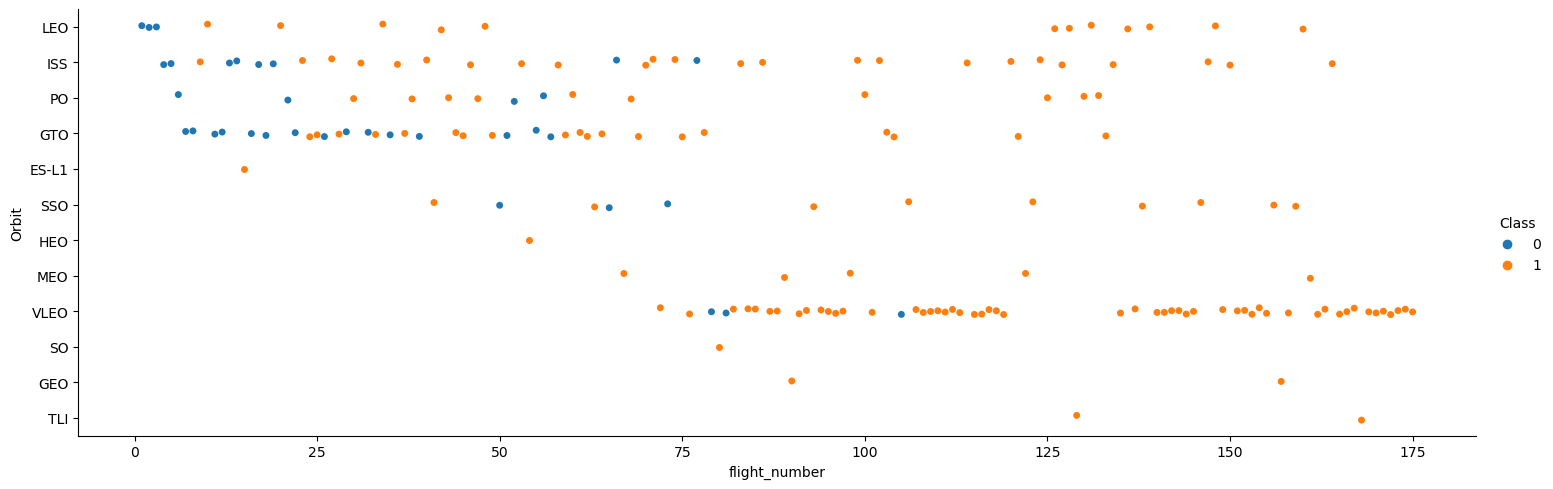

In [50]:
sns.catplot(x='flight_number',y='Orbit',hue='Class',data=df1_clean,aspect=3)
plt.show()

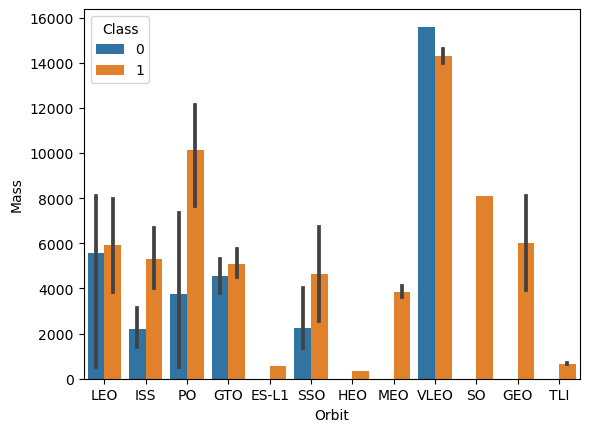

In [56]:
sns.barplot(x='Orbit',y='Mass',hue='Class',data=df1_clean)
plt.show()

In [67]:
year=[]
L=len(df1_clean)
for i in range(L):
    x=df1_clean['date'][i].split('-')[0]
    year.append(x)

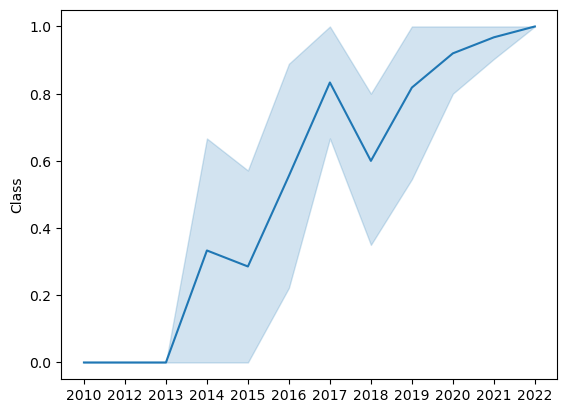

In [70]:
sns.lineplot(x=year,y=df1_clean['Class'])
plt.show()

In [75]:
features = df1_clean[['flight_number', 'Mass', 'Orbit', 'launch_site', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()


,flight_number,Mass,Orbit,launch_site,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,8117.574038,LEO,CCSFS SLC 40,1.0,False,False,False,NaN,1.0,0.0,B0003
1,2,8117.574038,LEO,CCSFS SLC 40,1.0,False,False,False,NaN,1.0,0.0,B0004
2,3,525.000000,LEO,CCSFS SLC 40,1.0,False,False,False,NaN,1.0,0.0,B0005
3,4,400.000000,ISS,CCSFS SLC 40,1.0,False,False,False,NaN,1.0,0.0,B0006
4,5,677.000000,ISS,CCSFS SLC 40,1.0,False,False,False,NaN,1.0,0.0,B0007


In [76]:
df_one_hot=pd.get_dummies(features)
df_one_hot

,flight_number,Mass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,1,8117.574038,1.0,False,False,False,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,8117.574038,1.0,False,False,False,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,525.000000,1.0,False,False,False,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,400.000000,1.0,False,False,False,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,677.000000,1.0,False,False,False,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,171,13260.000000,7.0,True,True,True,5.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,172,13260.000000,14.0,True,True,True,5.0,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,173,13260.000000,6.0,True,True,True,5.0,5.0,0,0,...,0,0,0,0,1,0,0,0,0,0
173,174,13260.000000,4.0,True,True,True,5.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
df_one_hot=df_one_hot.astype('float')

In [78]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 95 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   flight_number                        175 non-null    float64
 1   Mass                                 175 non-null    float64
 2   Flights                              175 non-null    float64
 3   GridFins                             175 non-null    float64
 4   Reused                               175 non-null    float64
 5   Legs                                 175 non-null    float64
 6   Block                                175 non-null    float64
 7   ReusedCount                          175 non-null    float64
 8   Orbit_ES-L1                          175 non-null    float64
 9   Orbit_GEO                            175 non-null    float64
 10  Orbit_GTO                            175 non-null    float64
 11  Orbit_HEO                       

In [79]:
df_one_hot.to_csv('dataset_part3.csv', index=False)


preprocess the data

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [84]:
X=df_one_hot
y=df1_clean['Class'].to_numpy()

In [85]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

Split the data

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [104]:
model_params={
    'lr':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,10,20]
        }
    },
    'svm':{
        'model':SVC(),
        'params':{
            'C':[1,10,20],
            'kernel':['linear','rbf']
        }
    },
     'dtc':{
            'model':DecisionTreeClassifier(),
            'params':{  
                'criterion':['gini','entropy'],
                'max_depth':['None',10,20,30]
        }
    },
     'knn':{
         'model':KNeighborsClassifier(),
         'params':{
             'n_neighbors':[3,5,7],
             'weights': ['uniform', 'distance'],
             'p': [1, 2]
         }
     }
    
}

In [111]:
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=10,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])

C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    check_scala

In [112]:
df

,model,best_score,best_params
0,lr,0.907143,{'C': 10}
1,svm,0.878571,"{'C': 1, 'kernel': 'linear'}"
2,dtc,0.914286,"{'criterion': 'entropy', 'max_depth': 30}"
3,knn,0.907143,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}"


KNN model

In [120]:
model=KNeighborsClassifier(n_neighbors=5,weights ='uniform', p=1)
model.fit(X_train,y_train)

KNeighborsClassifier(p=1)

In [121]:
model.score(X_train,y_train)

0.9214285714285714

In [122]:
model.score(X_test,y_test)

0.8285714285714286

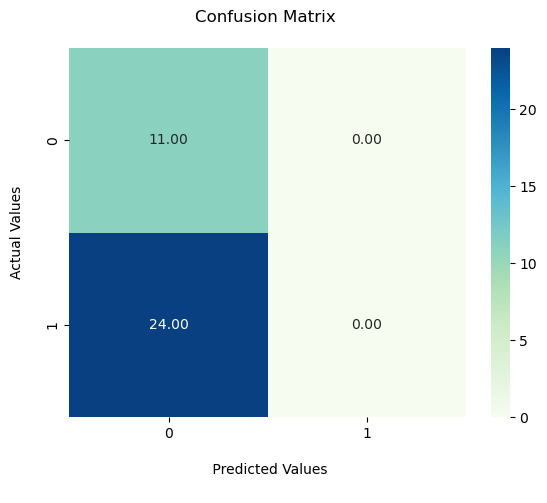

In [123]:
from sklearn.metrics import confusion_matrix
predictions=[]
pred=model.predict(X_test)
for p in pred:
    predi=np.argmax(p)
    predictions.append(predi)
predictions
fx=sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()


0.8285714285714286